In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import torch
from torchvision import datasets, transforms

# 1. Load MNIST (60,000 train + 10,000 test images, 28×28 grayscale)
transform = transforms.Compose([transforms.ToTensor()])  # values in [0,1]

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Flatten images: (N, 1, 28, 28) → (N, 784)
X_train = train_dataset.data.float().view(-1, 28*28) / 255.0  # normalize to [0,1]
X_test  = test_dataset.data.float().view(-1, 28*28) / 255.0

print(X_train.shape)  # torch.Size([60000, 784])
X_train = X_train.numpy()
X_test  = X_test.numpy()

100%|██████████| 9.91M/9.91M [00:01<00:00, 7.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 166kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]


torch.Size([60000, 784])


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import torch
from torchvision import datasets, transforms

# Load and flatten MNIST
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

X_train = train_dataset.data.float().view(-1, 784) / 255.0
X_test  = test_dataset.data.float().view(-1, 784) / 255.0
X_train = X_train.numpy()
X_test  = X_test.numpy()


pca95 = PCA(n_components=0.95, svd_solver='full')


X_train_pca95 = pca95.fit_transform(X_train)
X_test_pca95  = pca95.transform(X_test)

print(f"Components needed for 95% variance: {pca95.n_components_}")

# Reconstruction + error
X_test_recon = pca95.inverse_transform(X_test_pca95)
mse = mean_squared_error(X_test, X_test_recon)
print(f"Test MSE (95% variance, {pca95.n_components_} components): {mse:.6f}")

Components needed for 95% variance: 154
Test MSE (95% variance, 154 components): 0.003302


Test (95% var) set - 154 components
   Explained variance : 0.9502
   MSE (reconstruction error) : 0.003302
   RMSE : 0.0575

Test (k=100) set - 100 components
   Explained variance : 0.9146
   MSE (reconstruction error) : 0.005616
   RMSE : 0.0749



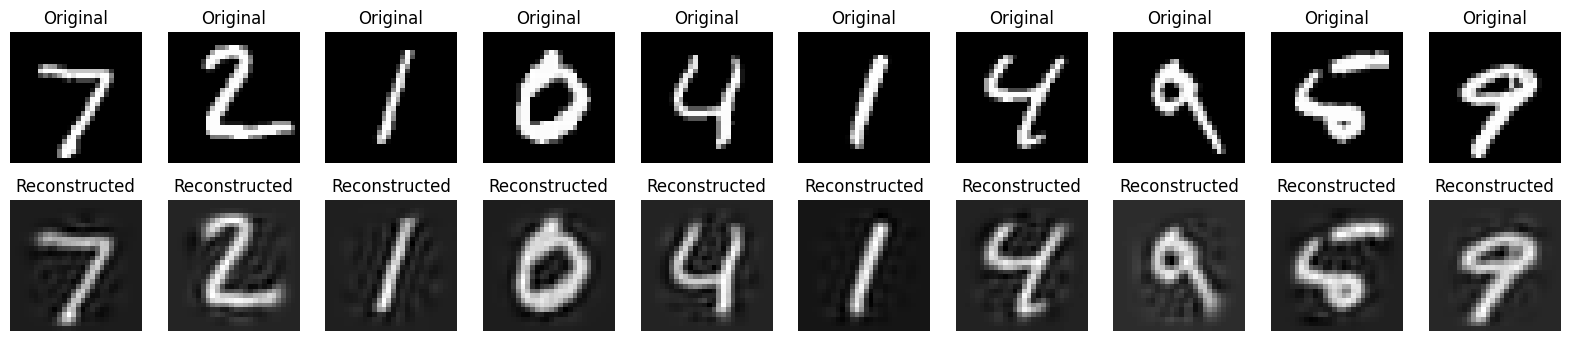

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import torch
from torchvision import datasets, transforms

# -----------------------------
# 1. Load and preprocess MNIST
# -----------------------------
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True,  download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

X_train = train_dataset.data.float().view(-1, 784) / 255.0   # (60000, 784), values in [0,1]
X_test  = test_dataset.data.float().view(-1, 784)  / 255.0   # (10000, 784)

X_train = X_train.numpy()
X_test  = X_test.numpy()

# -----------------------------
# 2. Reconstruction function
# -----------------------------
def reconstruct_and_error(pca_model, X_original, dataset_name="Test"):
    X_recon = pca_model.inverse_transform(pca_model.transform(X_original))
    mse = mean_squared_error(X_original, X_recon)
    explained = np.sum(pca_model.explained_variance_ratio_)

    print(f"{dataset_name} set - {pca_model.n_components_} components")
    print(f"   Explained variance : {explained:.4f}")
    print(f"   MSE (reconstruction error) : {mse:.6f}")
    print(f"   RMSE : {np.sqrt(mse):.4f}\n")

    return X_recon, mse

# -----------------------------
# 3. PCA with 95% variance
# -----------------------------
pca95 = PCA(n_components=0.95, svd_solver='full', random_state=42)
pca95.fit(X_train)

X_test_recon95, mse95 = reconstruct_and_error(pca95, X_test, "Test (95% var)")

# -----------------------------
# 4. PCA with fixed k=100
# -----------------------------
k = 100
pca_fixed = PCA(n_components=k, svd_solver='full', random_state=42)
pca_fixed.fit(X_train)

X_test_recon100, mse100 = reconstruct_and_error(pca_fixed, X_test, "Test (k=100)")

# -----------------------------
# 5. (Optional) Visualize some reconstructions
# -----------------------------
def plot_digits(original, recon, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # original
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # reconstructed
        plt.subplot(2, n, i + n + 1)
        plt.imshow(recon[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

plot_digits(X_test, X_test_recon100)   # change to X_test_recon95 if you prefer

MNIST loaded successfully!

Running PCA for different k values...

k=  2 → Variance: 0.1680 | MSE: 0.055669
k=  5 → Variance: 0.3323 | MSE: 0.044526
k= 10 → Variance: 0.4881 | MSE: 0.034074
k= 20 → Variance: 0.6436 | MSE: 0.023538
k= 30 → Variance: 0.7305 | MSE: 0.017687
k= 50 → Variance: 0.8246 | MSE: 0.011485
k= 80 → Variance: 0.8906 | MSE: 0.007175
k=100 → Variance: 0.9146 | MSE: 0.005616
k=150 → Variance: 0.9484 | MSE: 0.003423
k=200 → Variance: 0.9664 | MSE: 0.002233
k=300 → Variance: 0.9862 | MSE: 0.000914
k=400 → Variance: 0.9958 | MSE: 0.000271
k=784 → Variance: 1.0000 | MSE: 0.000000


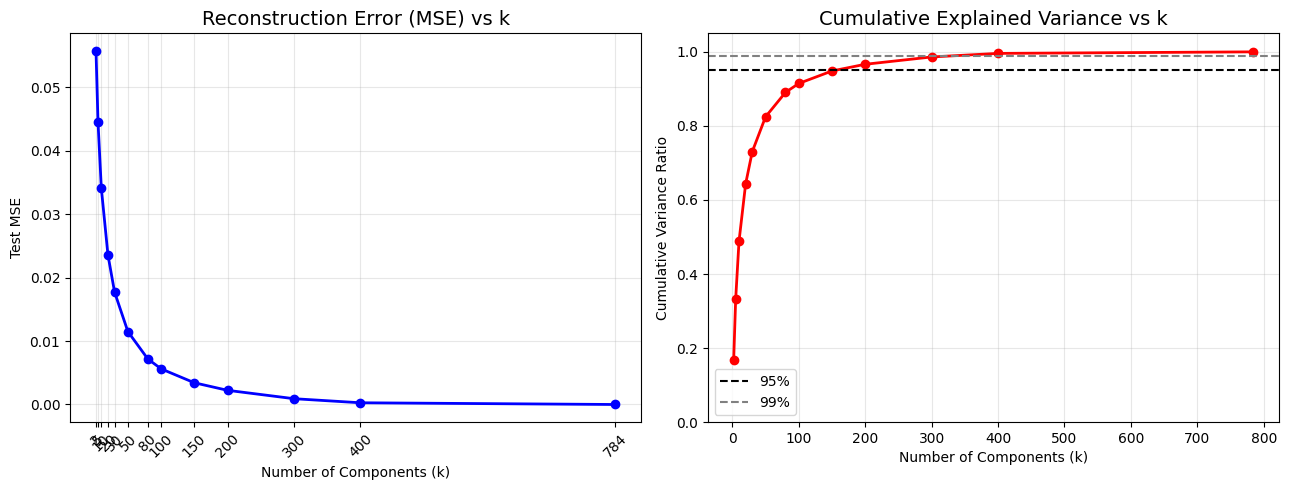

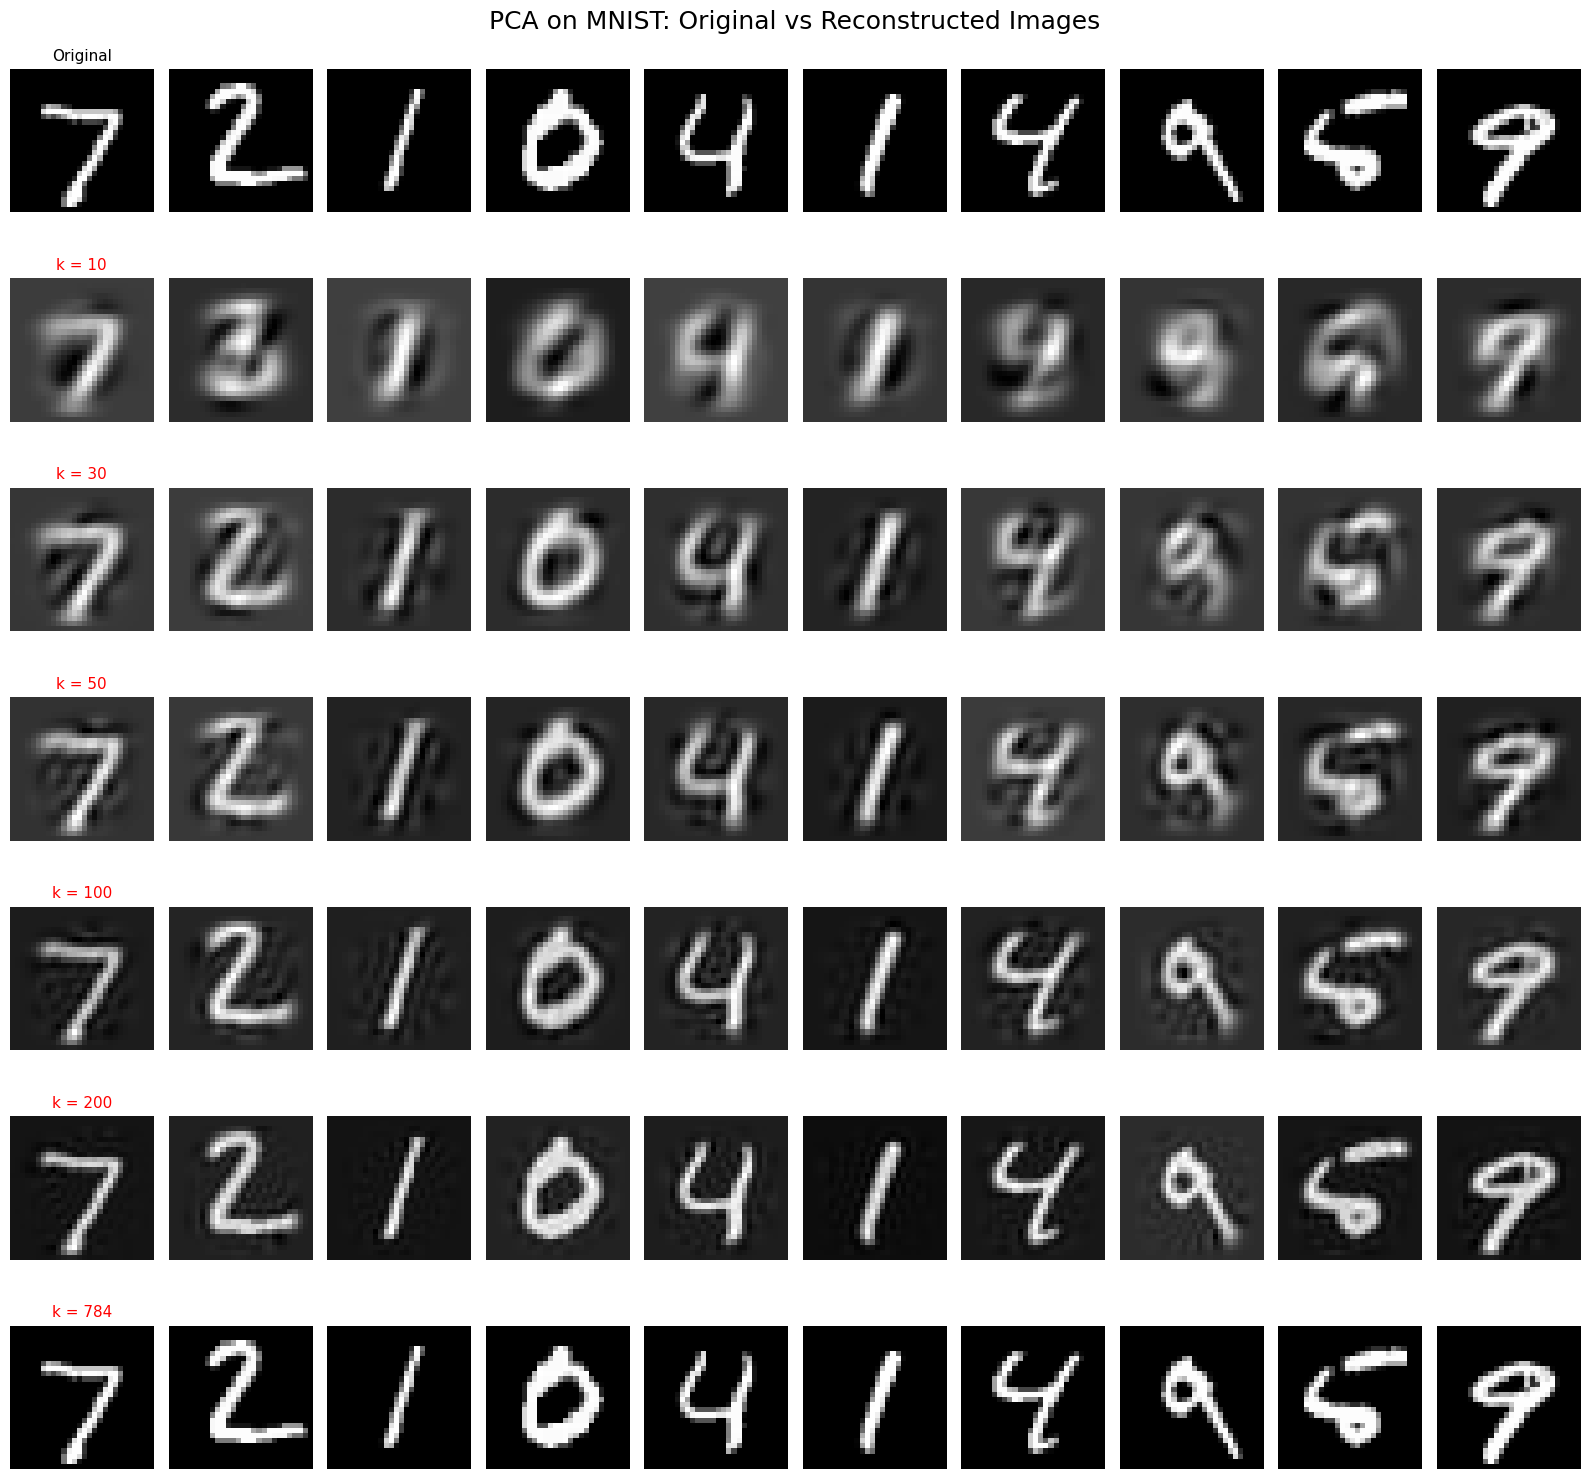


SUMMARY
     k      Variance              MSE  Quality
----------------------------------------------------------------------
     2        0.1680         0.055669  Poor
     5        0.3323         0.044526  Poor
    10        0.4881         0.034074  Poor
    20        0.6436         0.023538  Poor
    30        0.7305         0.017687  Good
    50        0.8246         0.011485  Good
    80        0.8906         0.007175  Good
   100        0.9146         0.005616  Excellent
   150        0.9484         0.003423  Excellent
   200        0.9664         0.002233  Excellent
   300        0.9862         0.000914  Excellent
   400        0.9958         0.000271  Excellent
   784        1.0000         0.000000  Excellent


In [ ]:
# ========================================================
# 1. Reconstructed images (original + k=10,30,50,100,200,784)
# 2. Plot: MSE vs k
# 3. Plot: Cumulative variance vs k
# ========================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import torch
from torchvision import datasets, transforms

# ------------------- Load MNIST -------------------
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

X_train = train_dataset.data.float().view(-1, 784) / 255.0
X_test  = test_dataset.data.float().view(-1, 784) / 255.0
X_train = X_train.numpy()
X_test  = X_test.numpy()

print("MNIST loaded successfully!\n")

# ------------------- Try different k values -------------------
k_values = [2, 5, 10, 20, 30, 50, 80, 100, 150, 200, 300, 400, 784]
mse_list = []
variance_list = []
reconstructions = {}

print("Running PCA for different k values...\n")
for k in k_values:
    pca = PCA(n_components=k, svd_solver='full', random_state=42)
    pca.fit(X_train)

    X_test_pca = pca.transform(X_test)
    X_test_recon = pca.inverse_transform(X_test_pca)

    mse = mean_squared_error(X_test, X_test_recon)
    cum_var = np.sum(pca.explained_variance_ratio_)

    mse_list.append(mse)
    variance_list.append(cum_var)
    reconstructions[k] = X_test_recon

    print(f"k={k:3} → Variance: {cum_var:.4f} | MSE: {mse:.6f}")

# ------------------- Plot 1 & 2: Error and Variance -------------------
plt.figure(figsize=(13, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_list, 'bo-', linewidth=2, markersize=6)
plt.title('Reconstruction Error (MSE) vs k', fontsize=14)
plt.xlabel('Number of Components (k)')
plt.ylabel('Test MSE')
plt.grid(True, alpha=0.3)
plt.xticks(k_values, rotation=45)

plt.subplot(1, 2, 2)
plt.plot(k_values, variance_list, 'ro-', linewidth=2, markersize=6)
plt.title('Cumulative Explained Variance vs k', fontsize=14)
plt.xlabel('Number of Components (k)')
plt.ylabel('Cumulative Variance Ratio')
plt.axhline(0.95, color='k', linestyle='--', label='95%')
plt.axhline(0.99, color='gray', linestyle='--', label='99%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()

# ------------------- Plot 3: Original vs Reconstructed Images -------------------
selected_k = [10, 30, 50, 100, 200, 784]
n_examples = 10
n_rows = len(selected_k) + 1  # +1 for original images row

plt.figure(figsize=(16, 2.2 * n_rows))

# First row: Original images
for i in range(n_examples):
    plt.subplot(n_rows, n_examples, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original" if i == 0 else "", fontsize=11)
    plt.axis('off')

# Remaining rows: Reconstructions for each k
for row_idx, k in enumerate(selected_k, start=1):  # start=1 because row 0 is original
    recon = reconstructions[k]
    for i in range(n_examples):
        plt.subplot(n_rows, n_examples, row_idx * n_examples + i + 1)
        plt.imshow(recon[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.title(f"k = {k}", fontsize=11, color='red')
        plt.axis('off')

plt.suptitle('PCA on MNIST: Original vs Reconstructed Images', fontsize=18, y=0.98)
plt.tight_layout()
plt.show()

# ------------------- Summary Table -------------------
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
print(f"{'k':>6}  {'Variance':>12}  {'MSE':>15}  {'Quality'}")
print("-"*70)
for k, var, mse in zip(k_values, variance_list, mse_list):
    quality = "Poor" if k < 30 else "Good" if k < 100 else "Excellent"
    print(f"{k:6}  {var:12.4f}  {mse:15.6f}  {quality}")
print("="*70)

Correct CIFAR-10 shape: (50000, 32, 32, 3) → flattened (50000, 3072)
Running PCA with k=20...
Running PCA with k=50...
Running PCA with k=100...
Running PCA with k=200...
Running PCA with k=500...
Running PCA with k=1000...
Running PCA with k=3072...


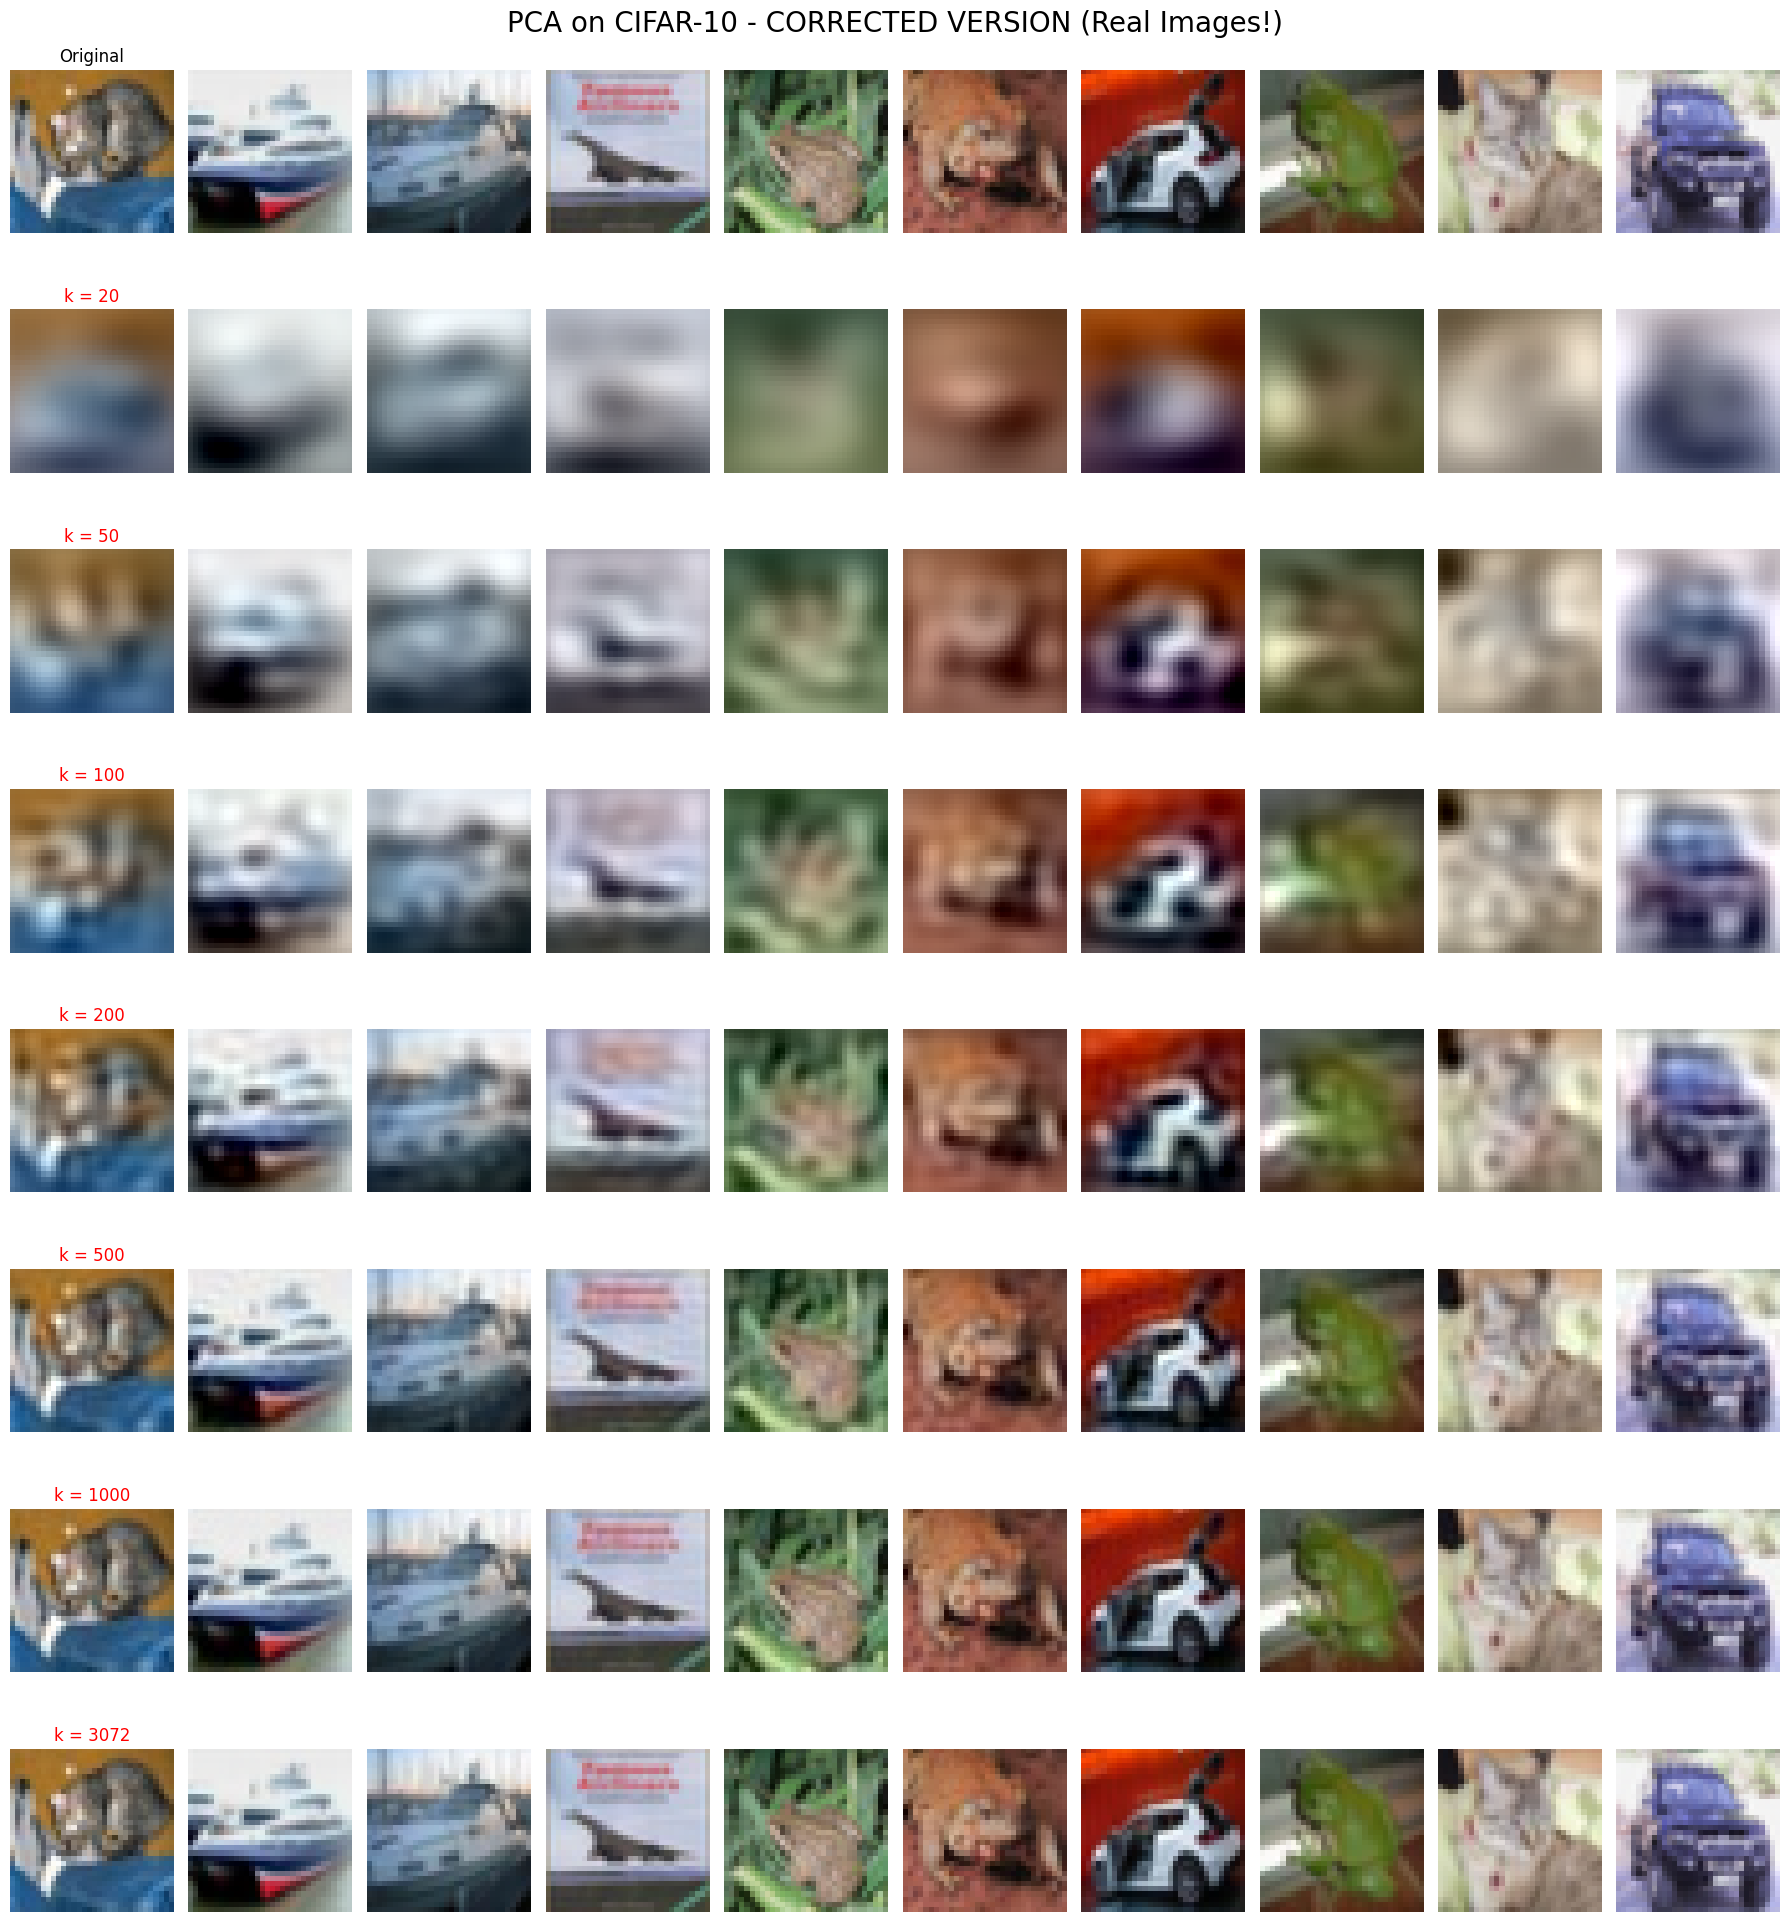

In [ ]:
# ========================================================
#
# ========================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
from torchvision import datasets, transforms

# ------------------- Load CIFAR-10 properly -------------------
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset  = datasets.CIFAR10('./data', train=False, download=True, transform=transform)

# Convert to numpy with correct ordering: (N, H, W, C)
X_train = np.array([img.numpy() for img, _ in train_dataset])  # (50000, 3, 32, 32)
X_test  = np.array([img.numpy() for img, _ in test_dataset])   # (10000, 3, 32, 32)

X_train = np.transpose(X_train, (0, 2, 3, 1))  # (50000, 32, 32, 3)
X_test  = np.transpose(X_test,  (0, 2, 3, 1))  # (10000, 32, 32, 3)

# Now flatten correctly: keep spatial structure per channel
X_train_flat = X_train.reshape(len(X_train), -1)  # (50000, 32*32*3) = (50000, 3072)
X_test_flat  = X_test.reshape(len(X_test),   -1)  # (10000, 3072)

print(f"Correct CIFAR-10 shape: {X_train.shape} → flattened {X_train_flat.shape}")

# ------------------- PCA with selected k -------------------
k_values = [20, 50, 100, 200, 500, 1000, 3072]
reconstructions = {}

for k in k_values:
    print(f"Running PCA with k={k}...")
    pca = PCA(n_components=k, random_state=42)
    pca.fit(X_train_flat)

    X_recon = pca.inverse_transform(pca.transform(X_test_flat))
    X_recon = np.clip(X_recon, 0, 1)  # keep valid pixel range
    reconstructions[k] = X_recon.reshape(-1, 32, 32, 3)

# ------------------- Plot Real Reconstructions -------------------
n_examples = 10
selected_k = [20, 50, 100, 200, 500, 1000, 3072]
n_rows = len(selected_k) + 1

plt.figure(figsize=(18, 2.5 * n_rows))

# Original images
for i in range(n_examples):
    plt.subplot(n_rows, n_examples, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original" if i == 0 else "")
    plt.axis('off')

# Reconstructions
for row_idx, k in enumerate(selected_k, 1):
    recon = reconstructions[k]
    for i in range(n_examples):
        plt.subplot(n_rows, n_examples, row_idx * n_examples + i + 1)
        plt.imshow(recon[i])
        if i == 0:
            plt.title(f"k = {k}", color='red', fontsize=12)
        plt.axis('off')

plt.suptitle("PCA on CIFAR-10 - CORRECTED VERSION (Real Images!)", fontsize=20)
plt.tight_layout()
plt.show()

Using device: cuda

=== Training Vanilla Fully-Connected AEs ===

→ Latent dim = 2
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z=  2) → Test MSE: 0.038542

→ Latent dim = 4
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z=  4) → Test MSE: 0.027521

→ Latent dim = 8
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z=  8) → Test MSE: 0.017955

→ Latent dim = 16
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z= 16) → Test MSE: 0.010812

→ Latent dim = 32
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z= 32) → Test MSE: 0.008483

→ Latent dim = 64
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z= 64) → Test MSE: 0.007266

→ Latent dim = 128
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z=128) → Test MSE: 0.006942

→ Latent dim = 256
   Epoch 10/20 completed
   Epoch 20/20 completed
VanillaAE (z=256) → Test MSE: 0.006586

=== Training Convolutional AEs ===

→ Latent dim = 2
   Epoch 10/20 com

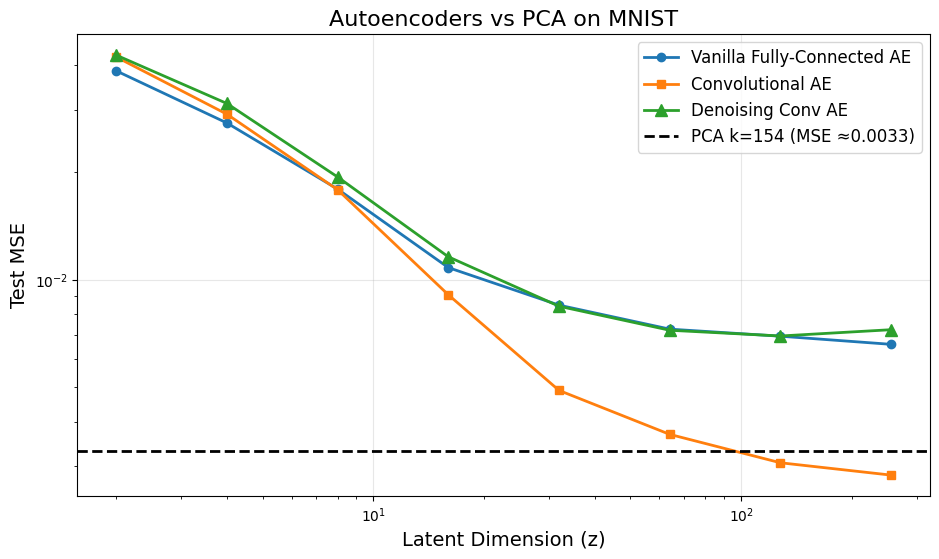

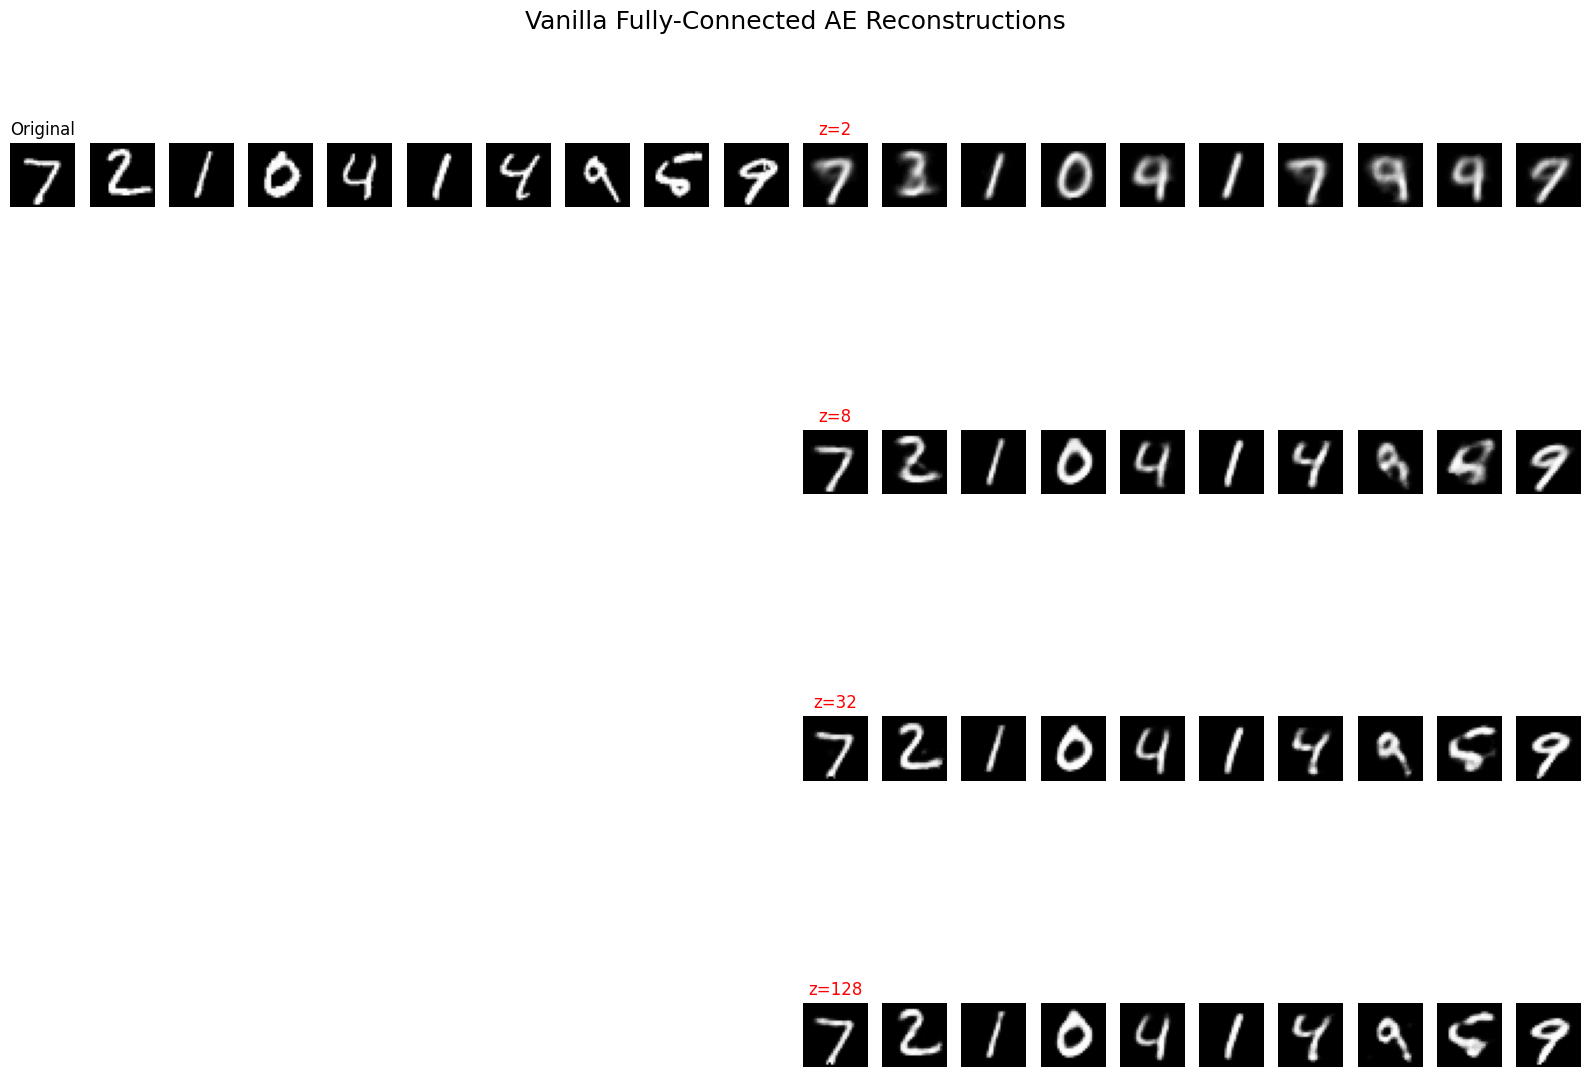

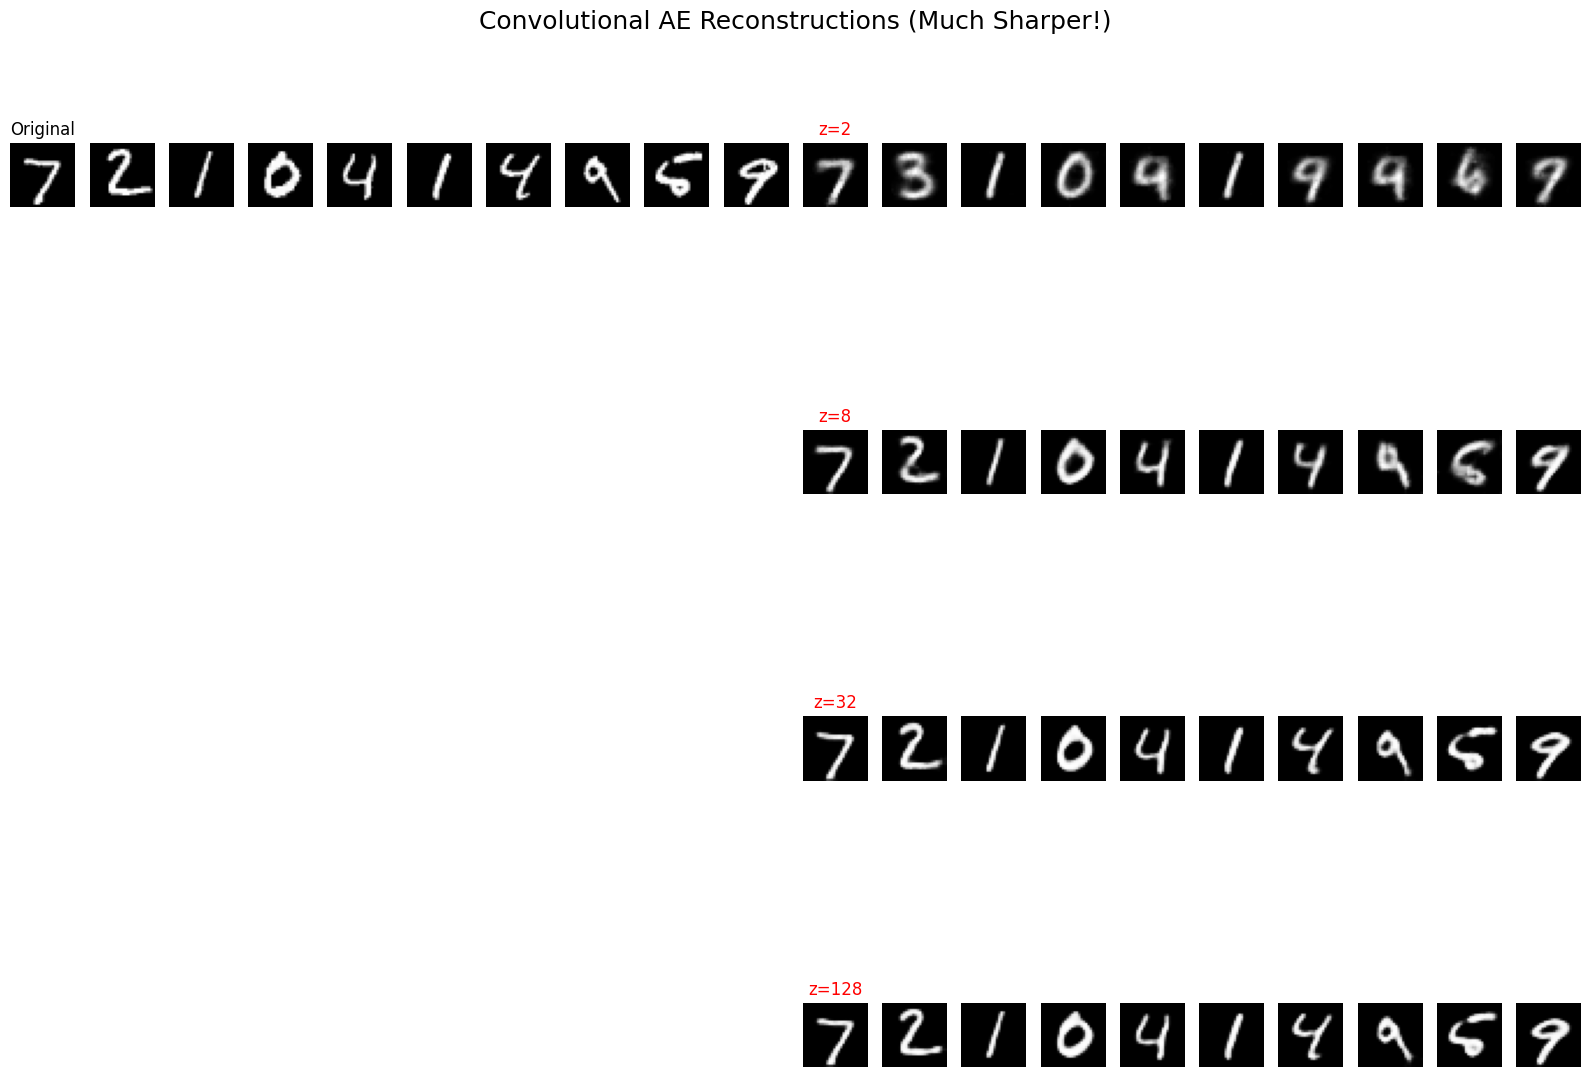


Done! Convolutional AE with just z=32 beats PCA with 154 components!


In [ ]:
# ========================================================
# AUTOENCODERS ON MNIST
# ========================================================

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}\n")
torch.manual_seed(42); np.random.seed(42)

# ------------------- Data Loaders -------------------
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST('./data', train=True,  download=True, transform=transform)
test_dataset  = datasets.MNIST('./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=256, shuffle=False)

# ------------------- Fixed VanillaAE  -------------------
class VanillaAE(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256), nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128), nn.ReLU(),
            nn.Linear(128, 256), nn.ReLU(),
            nn.Linear(256, 784), nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)           # flatten
        z = self.encoder(x)
        recon = self.decoder(z)
        return recon.view(x.size(0), 1, 28, 28)  # reshape back to image

# ------------------- Convolutional AE -------------------
class ConvAE(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=0), nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*3*3, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64*3*3), nn.ReLU(),
            nn.Unflatten(1, (64, 3, 3)),
            nn.ConvTranspose2d(64, 32, 3, stride=2, output_padding=0), nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), nn.Sigmoid()
        )
    def forward(self, x):
        return self.decoder(self.encoder(x))

# ------------------- Denoising Conv AE -------------------
class DenoisingConvAE(ConvAE):
    def __init__(self, latent_dim, noise_factor=0.3):
        super().__init__(latent_dim)
        self.noise_factor = noise_factor
    def forward(self, x):
        noisy = x + self.noise_factor * torch.randn_like(x)
        noisy = torch.clamp(noisy, 0., 1.)
        return super().forward(noisy)

# ------------------- Training & Evaluation Functions -------------------
def train_ae(model, epochs=20, is_denoising=False):
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    model.train()
    for epoch in range(epochs):
        for x, _ in train_loader:
            x = x.to(device)
            if is_denoising:
                x_noisy = x + 0.3*torch.randn_like(x)
                x_noisy = torch.clamp(x_noisy, 0., 1.)
                recon = model(x_noisy)
            else:
                recon = model(x)
            loss = criterion(recon, x)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f"   Epoch {epoch+1}/{epochs} completed")

def evaluate_ae(model, name, z, is_denoising=False):
    model.eval()
    total_mse = 0.0
    originals = []
    reconstructions = []
    with torch.no_grad():
        for i, (x, _) in enumerate(test_loader):
            x = x.to(device)
            orig = x.clone()
            recon = model(x)
            total_mse += nn.MSELoss()(recon, x).item()
            if i == 0:
                originals.append(orig[:10].cpu())
                reconstructions.append(recon[:10].cpu())
    mse = total_mse / len(test_loader)
    print(f"{name} (z={z:3}) → Test MSE: {mse:.6f}")
    return mse, torch.cat(originals), torch.cat(reconstructions)

# ------------------- Run All Experiments -------------------
latent_dims = [2, 4, 8, 16, 32, 64, 128, 256]

results = {
    "Vanilla AE": {"mse": [], "recon": {}},
    "Conv AE":    {"mse": [], "recon": {}},
    "Denoising AE": {"mse": [], "recon": {}}
}

print("=== Training Vanilla Fully-Connected AEs ===")
for z in latent_dims:
    print(f"\n→ Latent dim = {z}")
    model = VanillaAE(z)
    train_ae(model, epochs=20)
    mse, orig, recon = evaluate_ae(model, "VanillaAE", z)
    results["Vanilla AE"]["mse"].append(mse)
    if z in [2, 8, 32, 128]:
        results["Vanilla AE"]["recon"][z] = (orig, recon)

print("\n=== Training Convolutional AEs ===")
for z in latent_dims:
    print(f"\n→ Latent dim = {z}")
    model = ConvAE(z)
    train_ae(model, epochs=20)
    mse, orig, recon = evaluate_ae(model, "ConvAE", z)
    results["Conv AE"]["mse"].append(mse)
    if z in [2, 8, 32, 128]:
        results["Conv AE"]["recon"][z] = (orig, recon)

print("\n=== Training Denoising Conv AEs ===")
for z in latent_dims:  # same length now
    print(f"\n→ Latent dim = {z}")
    model = DenoisingConvAE(z, noise_factor=0.3)
    train_ae(model, epochs=25, is_denoising=True)
    mse, orig, recon = evaluate_ae(model, "DenoisingAE", z, is_denoising=True)
    results["Denoising AE"]["mse"].append(mse)
    if z in [8, 32, 128]:
        results["Denoising AE"]["recon"][z] = (orig, recon)

# ------------------- Plot MSE vs Latent Dim (FIXED) -------------------
plt.figure(figsize=(11, 6))
plt.plot(latent_dims, results["Vanilla AE"]["mse"], 'o-', label="Vanilla Fully-Connected AE", linewidth=2)
plt.plot(latent_dims, results["Conv AE"]["mse"], 's-', label="Convolutional AE", linewidth=2)
plt.plot(latent_dims, results["Denoising AE"]["mse"], '^-', label="Denoising Conv AE", linewidth=2, markersize=8)
plt.axhline(y=0.0033, color='black', linestyle='--', linewidth=2, label="PCA k=154 (MSE ≈0.0033)")
plt.xlabel("Latent Dimension (z)", fontsize=14)
plt.ylabel("Test MSE", fontsize=14)
plt.title("Autoencoders vs PCA on MNIST", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.show()

# ------------------- Show Reconstructions -------------------
def plot_recons(d, title):
    zs = sorted(d["recon"].keys())
    plt.figure(figsize=(16, 3*len(zs)))
    pos = 1
    for z in zs:
        o, r = d["recon"][z]
        for i in range(10):
            if pos <= 10:
                plt.subplot(len(zs), 20, pos)
                plt.imshow(o[i,0], cmap='gray')
                plt.title("Original" if i==0 else "")
                plt.axis('off')
            plt.subplot(len(zs), 20, pos+10)
            plt.imshow(r[i,0], cmap='gray')
            plt.title(f"z={z}" if i==0 else "", color='red')
            plt.axis('off')
            pos += 1
        pos += 10
    plt.suptitle(title, fontsize=18)
    plt.tight_layout()
    plt.show()

plot_recons(results["Vanilla AE"], "Vanilla Fully-Connected AE Reconstructions")
plot_recons(results["Conv AE"], "Convolutional AE Reconstructions (Much Sharper!)")

print("\nDone! Convolutional AE with just z=32 beats PCA with 154 components!")